## Laboratorium 3 - Regresja logistyczna

In [4]:
import numpy as np
import random
import matplotlib.pyplot as plt
import csv
from sklearn.preprocessing import StandardScaler

In [5]:
def h_fun(X, theta):
    z = theta.T @ X
    h = 1.0 / (1.0 + np.exp(-z))
    return h

def calculate_cost(X, y, theta):
    h = h_fun(X, theta)
    y_1 = -y * np.log(h)
    y_0 = -(1 - y) * np.log(1 - h)
    return np.sum(y_1 + y_0) / X.shape[1]

def gradient_descent(X, y, theta, alpha, eps, max_iters=100000):
    m = X.shape[1]
    cost = calculate_cost(X, y, theta)

    for i in range(max_iters):
        h_y_diff = h_fun(X, theta) - y
        # gradient = h_y_diff @ X.T
        # theta = theta - alpha * gradient.T / m
        gradient = (X @ h_y_diff.T) / m  # Gradient, używamy np.dot dla macierzy
        theta = theta - alpha * gradient  # Aktualizacja theta

        # if i % 100 == 0:  # wydrukuj co 100 iterację
        #     print(f"Iteration {i}: cost = {cost}, theta = {theta.T}")

        previous_cost, cost = cost, calculate_cost(X, y, theta)
        if previous_cost - cost < eps:
            break

    return theta

### Zadanie 1

In [6]:
# Dane wejściowe
X = np.array([[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
              [0.3, 0.8, 1.7, 2.4, 2.9, 3.1, 4.5, 6.1]])
y = np.array([[0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0]])

# Inicjalizacja parametrów
theta = np.zeros((X.shape[0], 1))
eps = 1e-5  # akceptowalna różnica dla kolejnych wartości funkcji kosztu 
alpha = 1


# Optymalizacja
theta = gradient_descent(X, y, theta, alpha, eps)

# Wyświetlenie wyników
print("Optymalne współczynniki theta:", theta)

Optymalne współczynniki theta: [[-20.86924647]
 [  7.95532127]]


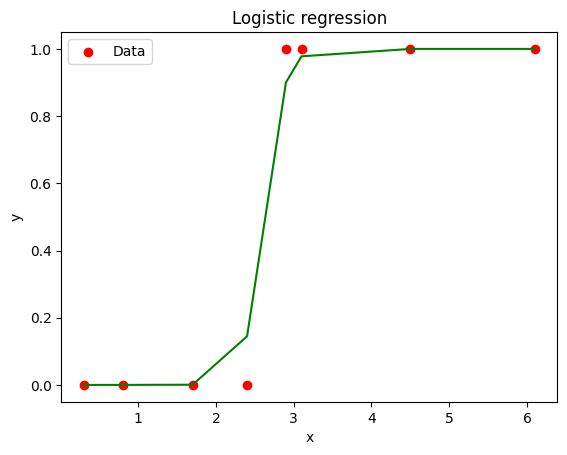

In [7]:
# Wykres
plt.scatter(X[1],y, label='Data', color='red')
plt.plot(X[1], h_fun(X,theta).flatten(), 'green')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Logistic regression')
plt.legend()
plt.show()

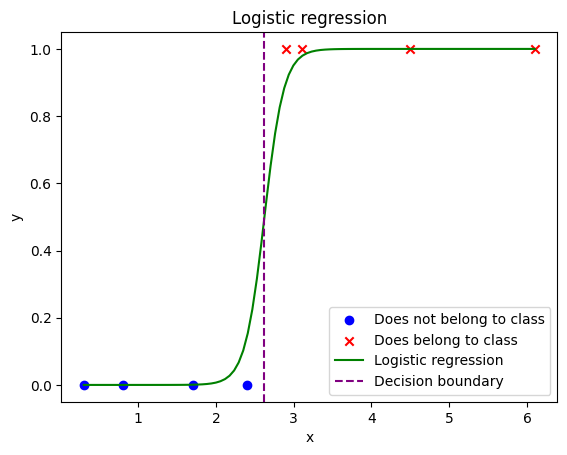

Optymalne współczynniki theta: [[-20.86924647]
 [  7.95532127]]


In [8]:
# Tworzenie zakresu x
x_range = np.linspace(min(X[1]), max(X[1]), 100)
X_plot = np.vstack((np.ones_like(x_range), x_range))

# Predykcja wartości h(x)
y_pred = h_fun(X_plot, theta)

# Tworzenie wykresu
plt.scatter(X[1, y[0] == 0], y[0, y[0] == 0], color='blue', label='Does not belong to class')
plt.scatter(X[1, y[0] == 1], y[0, y[0] == 1], color='red', marker='x', label='Does belong to class')
plt.plot(x_range, y_pred.flatten(), label="Logistic regression", color="green")

# Granica decyzyjna
decision_boundary_x = -theta[0, 0] / theta[1, 0]
plt.axvline(decision_boundary_x, color="purple", linestyle="--", label="Decision boundary")

# Etykiety i legenda
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.title("Logistic regression")
plt.show()

# Wyświetlenie wyników
print("Optymalne współczynniki theta:", theta)

### Zadanie 2

In [36]:
with open("./admission.txt") as f:
    csv_reader = csv.reader(f)
    examples = []
    for row in csv_reader:
        examples.append([float(cell) for cell in row])
    data = np.array(examples)
    y = data[:, 2:3].T
    x = data[:, :2].T
    X = np.concatenate([np.ones([1, x.shape[1]]), x])
 
print(f'{X.shape=}')
print(f'{y.shape=}')

X.shape=(3, 100)
y.shape=(1, 100)


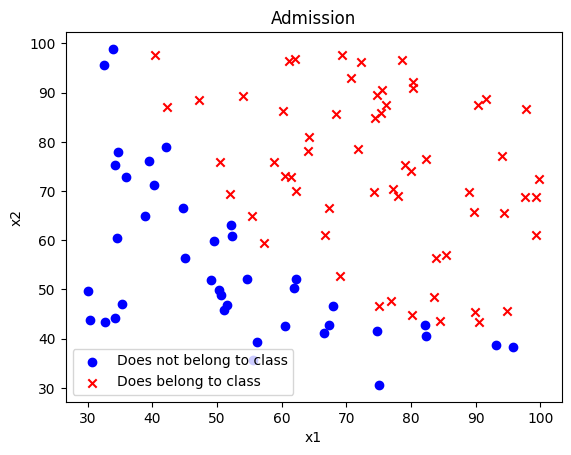

In [24]:
# Tworzenie wykresu
plt.scatter(X[1, y[0] == 0], X[2, y[0] == 0], color='blue', label='Does not belong to class')
plt.scatter(X[1, y[0] == 1], X[2, y[0] == 1], color='red', marker='x', label='Does belong to class')
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Admission')
plt.legend()
plt.show()

C:\Users\User\AppData\Local\Temp\ipykernel_8764\1866233120.py:9: RuntimeWarning: divide by zero encountered in log
  y_0 = -(1 - y) * np.log(1 - h)
C:\Users\User\AppData\Local\Temp\ipykernel_8764\1866233120.py:9: RuntimeWarning: invalid value encountered in multiply
  y_0 = -(1 - y) * np.log(1 - h)


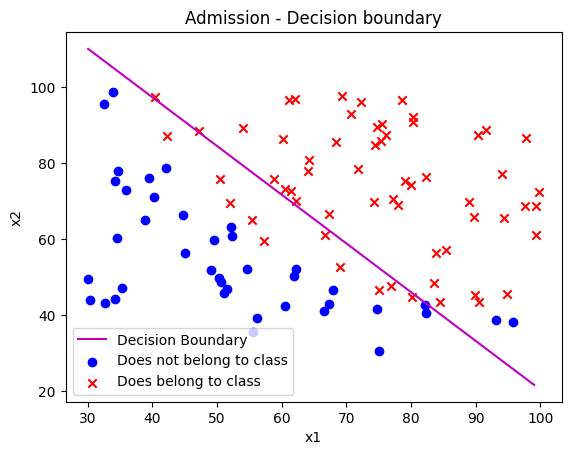

In [42]:
theta = np.zeros((X.shape[0], 1))
eps = 1e-10  # akceptowalna różnica dla kolejnych wartości funkcji kosztu 
alpha = 0.022
theta = gradient_descent(X, y, theta, alpha, eps)

x1_db = np.arange(X[1, :].min(), X[1, :].max(), 1)
x2_db = (-theta[0, 0] - theta[1, 0] * x1_db) / theta[2, 0]
plt.plot(x1_db, x2_db, '-m', label='Decision Boundary')

plt.scatter(X[1, y[0] == 0], X[2, y[0] == 0], color='blue', label='Does not belong to class')
plt.scatter(X[1, y[0] == 1], X[2, y[0] == 1], color='red', marker='x', label='Does belong to class')

plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Admission - Decision boundary')
plt.legend()
plt.show()

In [12]:
print(x1_db)
print(x2_db)

print(theta[0, 0])
print(theta[1, 0])
print(theta[2, 0])

[30.05882245 31.05882245 32.05882245 33.05882245 34.05882245 35.05882245
 36.05882245 37.05882245 38.05882245 39.05882245 40.05882245 41.05882245
 42.05882245 43.05882245 44.05882245 45.05882245 46.05882245 47.05882245
 48.05882245 49.05882245 50.05882245 51.05882245 52.05882245 53.05882245
 54.05882245 55.05882245 56.05882245 57.05882245 58.05882245 59.05882245
 60.05882245 61.05882245 62.05882245 63.05882245 64.05882245 65.05882245
 66.05882245 67.05882245 68.05882245 69.05882245 70.05882245 71.05882245
 72.05882245 73.05882245 74.05882245 75.05882245 76.05882245 77.05882245
 78.05882245 79.05882245 80.05882245 81.05882245 82.05882245 83.05882245
 84.05882245 85.05882245 86.05882245 87.05882245 88.05882245 89.05882245
 90.05882245 91.05882245 92.05882245 93.05882245 94.05882245 95.05882245
 96.05882245 97.05882245 98.05882245 99.05882245]
[90.23982859 89.07138067 87.90293275 86.73448483 85.56603692 84.397589
 83.22914108 82.06069316 80.89224524 79.72379732 78.5553494  77.38690149
 76

In [13]:
print(f"Koszt: {calculate_cost(X, y, theta)}")


print(X[:5, :5])  # Podgląd pierwszych 5 wierszy i 5 kolumn
print(f"Min X1: {X[1, :].min()}, Max X1: {X[1, :].max()}")
print(f"Min X2: {X[2, :].min()}, Max X2: {X[2, :].max()}")


Koszt: 0.47476967649311425
[[ 1.          1.          1.          1.          1.        ]
 [34.62365962 30.28671077 35.84740877 60.18259939 79.03273605]
 [78.02469282 43.89499752 72.90219803 86.3085521  75.34437644]]
Min X1: 30.05882244669796, Max X1: 99.82785779692128
Min X2: 30.60326323428011, Max X2: 98.86943574220611


### Zadanie 3

In [31]:
with open("./admission.txt") as f:
    csv_reader = csv.reader(f)
    examples = []
    for row in csv_reader:
        examples.append([float(cell) for cell in row])
    data = np.array(examples)
    y = data[:, 2:3].T
    x1 = data[:, :1].T
    x2 = data[:, 1:2].T
    X = np.concatenate([np.ones([1, x1.shape[1]]), x1, x2, x1**2])

print(f'{X.shape=}')
print(f'{y.shape=}')

X_max = X.max(axis=1)
X_max.shape = [X_max.shape[0], 1]
X_min = X.min(axis=1)
X_min[0] = 0
X_min.shape = [X_min.shape[0], 1]
X = (X - X_min) / (X_max - X_min)

X.shape=(4, 100)
y.shape=(1, 100)


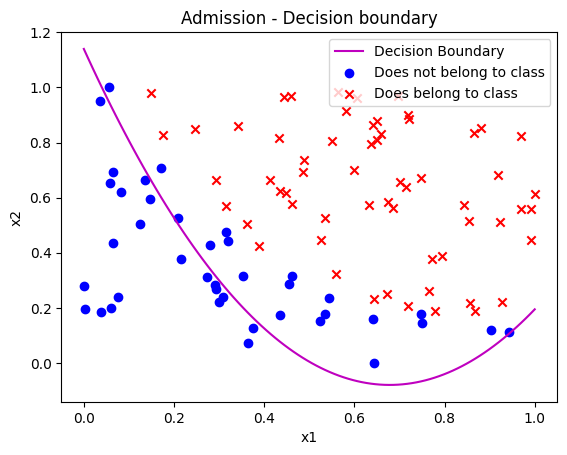

In [35]:
theta = np.zeros((X.shape[0], 1))
eps = 1e-7  # akceptowalna różnica dla kolejnych wartości funkcji kosztu 
alpha = 3
theta = gradient_descent(X, y, theta, alpha, eps)

x1_db = np.linspace(X[1, :].min(), X[1, :].max(), 100) 
x2_db = (-theta[0, 0] - theta[1, 0] * x1_db - theta[3, 0] * x1_db**2) / theta[2, 0]

# x1_db = np.arange(X[1, :].min(), X[1, :].max(), 0.01)
# x2_db = (-theta[0, 0] - theta[1, 0] * x1_db - theta[3, 0] * x1_db**2) / theta[2, 0]
plt.plot(x1_db, x2_db, '-m', label='Decision Boundary')

plt.scatter(X[1, y[0] == 0], X[2, y[0] == 0], color='blue', label='Does not belong to class')
plt.scatter(X[1, y[0] == 1], X[2, y[0] == 1], color='red', marker='x', label='Does belong to class')

plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Admission - Decision boundary')
plt.legend()
plt.show()



In [16]:
print(x1_db)
print(x2_db)

print(theta[0, 0])
print(theta[1, 0])
print(theta[2, 0])
print(theta[3, 0])

[0.         0.01010101 0.02020202 0.03030303 0.04040404 0.05050505
 0.06060606 0.07070707 0.08080808 0.09090909 0.1010101  0.11111111
 0.12121212 0.13131313 0.14141414 0.15151515 0.16161616 0.17171717
 0.18181818 0.19191919 0.2020202  0.21212121 0.22222222 0.23232323
 0.24242424 0.25252525 0.26262626 0.27272727 0.28282828 0.29292929
 0.3030303  0.31313131 0.32323232 0.33333333 0.34343434 0.35353535
 0.36363636 0.37373737 0.38383838 0.39393939 0.4040404  0.41414141
 0.42424242 0.43434343 0.44444444 0.45454545 0.46464646 0.47474747
 0.48484848 0.49494949 0.50505051 0.51515152 0.52525253 0.53535354
 0.54545455 0.55555556 0.56565657 0.57575758 0.58585859 0.5959596
 0.60606061 0.61616162 0.62626263 0.63636364 0.64646465 0.65656566
 0.66666667 0.67676768 0.68686869 0.6969697  0.70707071 0.71717172
 0.72727273 0.73737374 0.74747475 0.75757576 0.76767677 0.77777778
 0.78787879 0.7979798  0.80808081 0.81818182 0.82828283 0.83838384
 0.84848485 0.85858586 0.86868687 0.87878788 0.88888889 0.89898